In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv(r'C:\Users\Mhd Naqeeb\Downloads\email.csv')

In [4]:
df.head()

,Label,Mail
0,Ham,"Go until jurong point, crazy.. Available only ..."
1,Ham,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Ham,U dun say so early hor... U c already then say...
4,Ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10743 entries, 0 to 10742
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   10743 non-null  object
 1   Mail    10743 non-null  object
dtypes: object(2)
memory usage: 168.0+ KB


In [7]:
#Checking for duplicates
df.loc[df.duplicated()]

,Label,Mail
103,Ham,As per your request 'Melle Melle (Oru Minnamin...
154,Ham,As per your request 'Melle Melle (Oru Minnamin...
207,Ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,Ham,"Sorry, I'll call later"
326,Ham,No calls..messages..missed calls
...,...,...
10633,Ham,Subject: tenaska iv\nbob :\ni understand from ...
10636,Spam,Subject: \nthis week only : f . ree gen . erlc...
10661,Spam,Subject: \nthe permanent fix to penis growth\n...
10727,Ham,"Subject: cleburne - tenaska iv plant\ndaren ,\..."


In [8]:
#dropping duplicated rows
df.drop_duplicates();

In [9]:
df.isnull().sum()

Label    0
Mail     0
dtype: int64

Exploratory Data Analysis

[Text(0.5, 1.0, 'A countplot of spam and ham categories')]

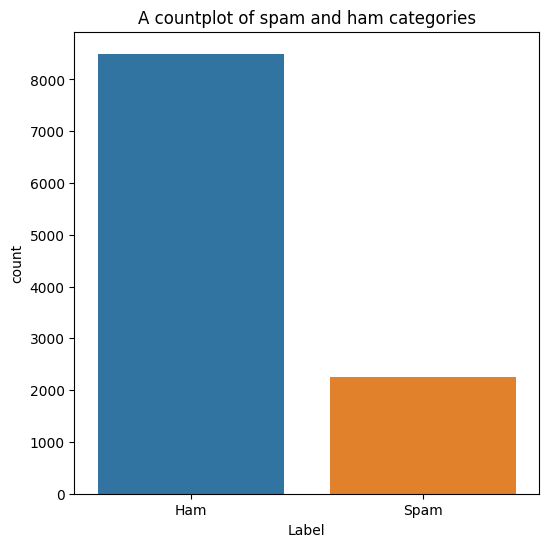

In [11]:
#Visualizing Number of Spam Messages and Ham
plt.figure(figsize=(6,6))
sns.countplot(x = 'Label', data = df).set(title = 'A countplot of spam and ham categories')

 Preparing Data For the model   

In [12]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
sns.set_style('whitegrid')

In [13]:
# Separating data into dependent and independent variables
X = df['Mail']
y = df['Label']

In [14]:
# Encoding the spam or ham to numerical forms
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [15]:
X = np.array(X, dtype=str)
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X = feature_extraction.fit_transform(X)

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Training Models

In [17]:
# Using Support Vector Machine as the first Model
model_1 = SVC()

In [18]:
model_1.fit(X_train, y_train)

SVC()

In [19]:
prediction = model_1.predict(X_test)

In [20]:
print('Confusion matrix: ', '\n', confusion_matrix(prediction,y_test))
print('Accuracy score: ', accuracy_score(prediction,y_test))
print(classification_report(prediction,y_test))

Confusion matrix:  
 [[2562  167]
 [   6  488]]
Accuracy score:  0.9463233012721067
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2729
           1       0.75      0.99      0.85       494

    accuracy                           0.95      3223
   macro avg       0.87      0.96      0.91      3223
weighted avg       0.96      0.95      0.95      3223



In [21]:
#Using Naive bayes
model_2 = MultinomialNB()
model_2.fit(X_train,y_train)

MultinomialNB()

In [22]:
prediction = model_2.predict(X_test)
print('Confusion matrix: ', '\n', confusion_matrix(prediction,y_test))
print('Accuracy score: ', accuracy_score(prediction,y_test))
print(classification_report(prediction,y_test))

Confusion matrix:  
 [[2566  324]
 [   2  331]]
Accuracy score:  0.8988520012410798
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2890
           1       0.51      0.99      0.67       333

    accuracy                           0.90      3223
   macro avg       0.75      0.94      0.81      3223
weighted avg       0.95      0.90      0.91      3223



In [23]:
#Using Random Forest Classifier
model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
prediction1=model_3.predict(X_test)
print('Confusion matrix: ', '\n', confusion_matrix(prediction1,y_test))
print('Accuracy score: ', accuracy_score(prediction1,y_test))
print(classification_report(prediction1,y_test))

Confusion matrix:  
 [[2559  148]
 [   9  507]]
Accuracy score:  0.9512876202295998
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2707
           1       0.77      0.98      0.87       516

    accuracy                           0.95      3223
   macro avg       0.89      0.96      0.92      3223
weighted avg       0.96      0.95      0.95      3223



In [25]:
#Using Logistic Regression
model_4 = LogisticRegression()

In [26]:
model_4.fit(X_train,y_train)

LogisticRegression()

In [27]:
prediction2 = model_4.predict(X_test)

In [28]:
print('Confusion matrix: ', '\n', confusion_matrix(prediction2,y_test))
print('Accuracy score: ', accuracy_score(prediction2,y_test))
print(classification_report(prediction2,y_test))

Confusion matrix:  
 [[2560  214]
 [   8  441]]
Accuracy score:  0.9311200744647844
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2774
           1       0.67      0.98      0.80       449

    accuracy                           0.93      3223
   macro avg       0.84      0.95      0.88      3223
weighted avg       0.95      0.93      0.94      3223



Using all the models to predict some message
For the prediction, 0 represents not spam and 1 represents spam

In [29]:
message = ["Hi Mohammed Naqeeb,Your  E-learning | University of Mangalore account was just signed in to from a new device."
           "Your account: MM/uni/20/0058 Naqeeb.naqeebrc@.com.Monday, 2 Aug 2023, 2:18 oppoDevice: Mozilla/5.0"
          "(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36IP: 154.160.22.180"
           "If this was you, then you don't need to do anything."
           "If you don't recognise this activity, please change your password."]
message = feature_extraction.transform(message)

In [30]:
model_1.predict(message)

array([0])

In [31]:
model_2.predict(message)

array([0])

In [32]:
model_3.predict(message)

array([0])

In [33]:
model_4.predict(message)

array([0])

In [36]:
message = ["Hello Mohammed Naqeeb ,",
"We are excited to inform you that you can now get a  Education Units (MCUs) by completing the Data Science and Machine Learning program from IBM.",
"A MCU is a recognized measure used to determine the time spent in learning during professional development and training programs.",
"Many employers, licensing agencies, and professional associations accept MCUs as evidence of a participant’s serious commitment to developing professional competence.",
"So, don't wait any longer and begin your learning journey today!",
"For any follow-up questions about the MCUs or the program, please reply to this email or schedule a call with your program advisor and contact us."]

In [38]:
message = feature_extraction.transform(message)

In [39]:
model_1.predict(message)

array([0, 0, 0, 0, 0, 0])

In [40]:
model_2.predict(message)

array([0, 0, 0, 0, 0, 0])

In [41]:
model_3.predict(message)

array([0, 0, 0, 0, 0, 0])

In [42]:
model_4.predict(message)

array([0, 0, 0, 0, 0, 0])

spam messages and fitted on all four models. Below are the predictions made by all models
Three models 1,3 and 4 predicted correctly by saying the message is spam and model two predicted that it is not spam

In [43]:
message = ["Since you are on our Preferred Subscriber List, we are giving you an EXTRA discount not available to everyone else."
           "This is because you are a loyal subscriber (BIG THANK YOU!)"
            "So please read carefully below, and then make sure you type the code FOREVER at checkout for an additional discount."
           " Retail value: 40,000"
            "Your special price today: only 20,000"
            "Please use this coupon code: FOREVER"
            "This is our LOWEST.  PRICE.  EVER."
            "BAD NEWS: This private offer expires in a few hours."]
message = feature_extraction.transform(message)

In [44]:
model_1.predict(message)

array([1])

In [45]:
model_2.predict(message)

array([0])

In [46]:
model_3.predict(message)

array([1])

In [47]:
model_4.predict(message)

array([1])

Summary

The predictions from the models are not consistent, with model_1, model_3, and model_4 indicating a positive outcome for the message, while model_2 predicts a negative outcome. 